### ARPU(Average Revenue Per User)

: 인당 평균 매출/
말 그대로  사용자 1명당 매출   
user_id를 nunique() 한 값으로 전체 매출을 나누면 된다.

​

### ARPPU(Average Revenue Per Paying User)

:  결제자 인당 평균 매출로 

위에 ARPU 달리 결제자  만  대상으로 함  
구매한 사람의 nunique() 값으로 전체 매출을 나누면 된다  
[출처] [WIL] 데이터 분석가도 알아야 해요 마케팅 용어1|작성자 어쩌다 망상가  


​


### DAU(​Daily Active Users)

:하루 동안 해당 서비스를 이용한 순수한 이용자 수를 나타내는 지표.   
날짜별 그룹화하여 user_id를 nunique하면 된다.


​


### MAU(​Monthly Active Users)

:한 달 동안 해당 서비스를 이용한 순수한 이용자 수를 나타내는 지표.  

달로 그룹화하여 user_id를 nunique() 하면 된다.  
[출처] [WIL] 데이터 분석가도 알아야 해요 마케팅 용어1|작성자 어쩌다 망상가


​


RFM 분석은 고객 분석 방법 중 하나로, 고객의 거래 내역 데이터를 기반으로 고객을 분류하는 기법입니다.  
RFM은 Recency, Frequency, Monetary의 약어로 각각 최근성, 빈도, 금액을 의미합니다.  

- Recency(최근성) : 고객이 얼마나 최근에 구매를 했는지를 나타내며, 최근 구매일수록 점수가 높게 부여됩니다. 

- Frequency(빈도) : 고객이 일정 기간 동안 구매한 빈도를 나타내며, 구매 횟수가 많을수록 점수가 높게 부여됩니다. 

- Monetary(금액) : 고객이 일정 기간 동안 구매한 총 금액을 나타내며, 구매 금액이 많을수록 점수가 높게 부여됩니다.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt


In [2]:
file_oct = 'data/2019-Oct_downcast.parquet.gzip'
file_nov = 'data/2019-Nov_downcast.parquet.gzip'

In [3]:
df_oct = pd.read_parquet(file_oct)
df_nov = pd.read_parquet(file_nov)

df_oct.shape, df_nov.shape

((42413435, 4), (67392010, 4))

In [4]:
df_oct.info(), df_nov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42413435 entries, 0 to 42413434
Data columns (total 4 columns):
 #   Column      Dtype         
---  ------      -----         
 0   event_time  datetime64[ns]
 1   event_type  category      
 2   price       float32       
 3   user_id     int64         
dtypes: category(1), datetime64[ns](1), float32(1), int64(1)
memory usage: 849.4 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67392010 entries, 0 to 67392009
Data columns (total 4 columns):
 #   Column      Dtype              
---  ------      -----              
 0   event_time  datetime64[ns, UTC]
 1   event_type  category           
 2   price       float32            
 3   user_id     int64              
dtypes: category(1), datetime64[ns, UTC](1), float32(1), int64(1)
memory usage: 1.3 GB


(None, None)

### ARPU
- user_id를 nunique() 한 값으로 전체 매출을 나누면 된다.

In [5]:
df_oct['event_type'].unique()

['view', 'purchase', 'cart']
Categories (3, object): ['cart', 'purchase', 'view']

In [6]:
# ARPU, ARPPU dataframe 생성
df_arpu_arppu = pd.DataFrame({'ARPU': [0, 0],
                        'ARPPU':[0, 0]},
                       index=['2019-10', '2019-11'])

In [7]:
# ARPU
df_arpu_arppu.iloc[0, 0] = (df_oct.loc[df_oct['event_type'] == 'purchase', 'price'].sum() / 
                            df_oct['user_id'].nunique())

df_arpu_arppu.iloc[1, 0] = (df_nov.loc[df_nov['event_type'] == 'purchase', 'price'].sum() / 
                            df_nov['user_id'].nunique())

In [8]:
# ARPPU
df_arpu_arppu.iloc[0, 1] = (df_oct.loc[df_oct['event_type'] == 'purchase', 'price'].sum() / 
                            df_oct.loc[df_oct['event_type'] == 'purchase','user_id'].nunique())

df_arpu_arppu.iloc[1, 1] = (df_nov.loc[df_nov['event_type'] == 'purchase', 'price'].sum() / 
                            df_nov.loc[df_nov['event_type'] == 'purchase','user_id'].nunique())

In [9]:
df_arpu_arppu.round(2)

,ARPU,ARPPU
2019-10,76.08,662.41
2019-11,74.45,623.12


### DAU, MAU
- 날짜별 그룹화하여 user_id를 nunique하면 된다.
- 달로 그룹화하여 user_id를 nunique() 하면 된다.

In [10]:
df_oct['day'] = df_oct['event_time'].dt.day

In [11]:
df_nov['day'] = df_nov['event_time'].dt.day

In [36]:
df_oct_dau = df_oct.groupby('day').agg({'user_id' : 'nunique'})
df_nov_dau = df_nov.groupby('day').agg({'user_id' : 'nunique'})

Text(0.5, 1.0, 'DAU_Oct')

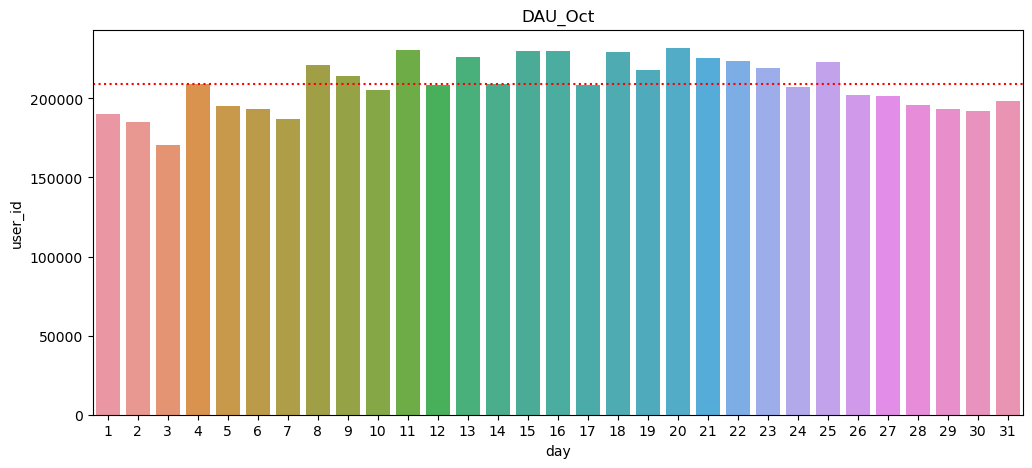

In [48]:
plt.figure(figsize=(12, 5))
sns.barplot(data=df_oct_dau.iloc[:10], x=df_oct_dau.index, y = df_oct_dau['user_id'])
plt.axhline(y = df_oct_dau['user_id'].mean(), ls=':', c='r')
plt.title('DAU_Oct')

Text(0.5, 1.0, 'DAU_Nov')

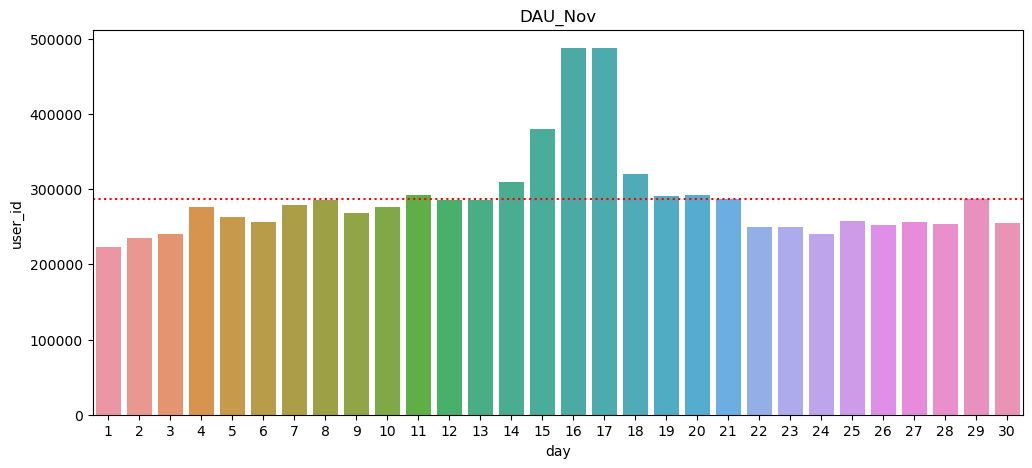

In [49]:
plt.figure(figsize=(12, 5))
sns.barplot(data=df_nov_dau.iloc[:10], x=df_nov_dau.index, y = df_nov_dau['user_id'])
plt.axhline(y = df_nov_dau['user_id'].mean(), ls=':', c='r')
plt.title('DAU_Nov')

In [50]:
# MOU
df_mou = pd.DataFrame()
df_mou.loc['MOU', 'Oct'] = df_oct['user_id'].nunique()
df_mou.loc['MOU', 'Nov'] = df_nov['user_id'].nunique()
df_mou

,Oct,Nov
MOU,3022290.0,3696117.0


Text(0.5, 1.0, 'MOU')

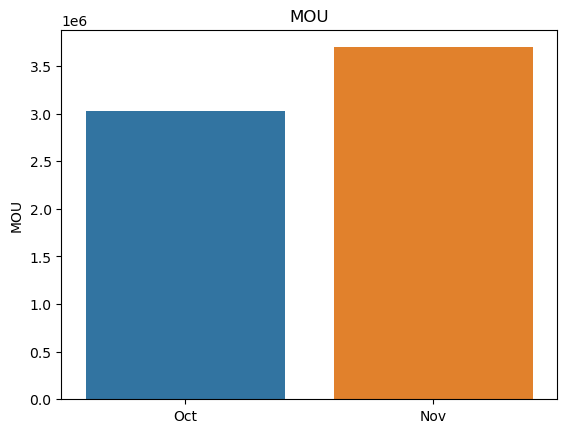

In [51]:
plt.figure()
sns.barplot(data=df_mou.T, x=df_mou.T.index, y='MOU')

plt.title('MOU')